<a href="https://colab.research.google.com/github/kr-aVEn/AQI-Prediction-Using-Machine-Learning-DELHI-/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost tensorflow keras statsmodels


In [ ]:
import pandas as pd
df=pd.read_csv("final_dataset.csv")
print(df.head())
df.info()

   Date  Month  Year  Holidays_Count  Days   PM2.5    PM10     NO2    SO2  \
0     1      1  2021               0     5  408.80  442.42  160.61  12.95   
1     2      1  2021               0     6  404.04  561.95   52.85   5.18   
2     3      1  2021               1     7  225.07  239.04  170.95  10.93   
3     4      1  2021               0     1   89.55  132.08  153.98  10.42   
4     5      1  2021               0     2   54.06   55.54  122.66   9.70   

     CO  Ozone  AQI  
0  2.77  43.19  462  
1  2.60  16.43  482  
2  1.40  44.29  263  
3  1.01  49.19  207  
4  0.64  48.88  149  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 no

In [ ]:
columns_to_drop = ['Date', 'Month', 'Year', 'Days']

df_reduced = df.drop(columns=columns_to_drop)


In [ ]:
df['Holidays_Count'].value_counts()


,count
Holidays_Count,
0,1184
1,277


In [ ]:
df.groupby('Holidays_Count')['AQI'].mean()
df.groupby('Holidays_Count')['AQI'].median()



,AQI
Holidays_Count,
0,189.0
1,187.0


In [ ]:
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True),inplace=True)

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64


In [ ]:
if df['Days'].dtype=='object':
  df['Days']=df['Days'].astype('category').cat.codes


## **Ploting**

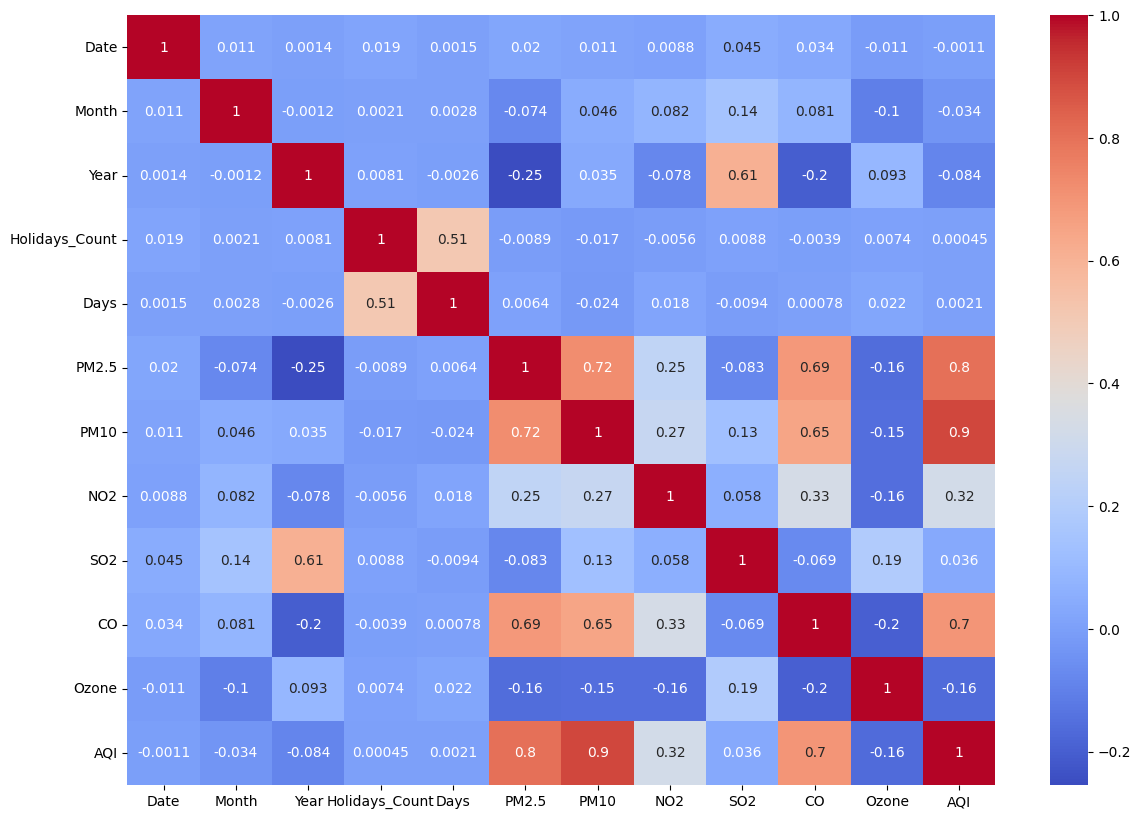

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

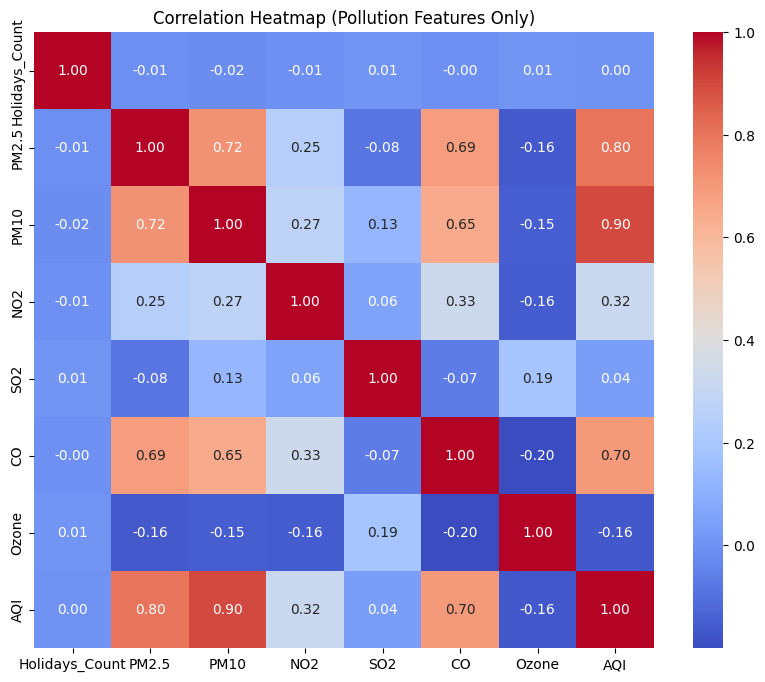

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df_reduced.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Pollution Features Only)")
plt.show()


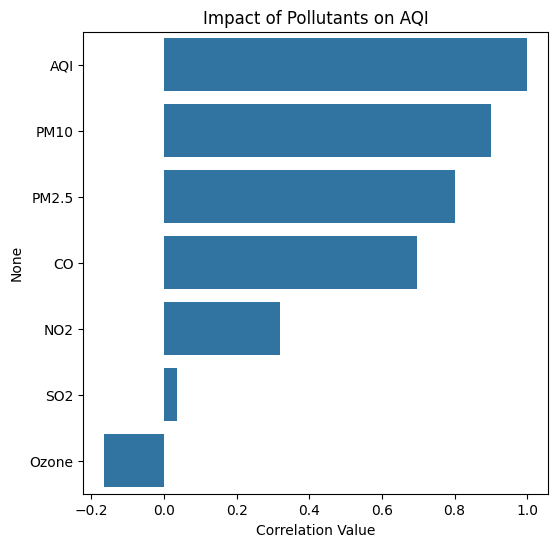

In [ ]:
pollution_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']

aqi_corr = df[pollution_cols + ['AQI']].corr()['AQI'].sort_values(ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(x=aqi_corr.values, y=aqi_corr.index)
plt.title("Impact of Pollutants on AQI")
plt.xlabel("Correlation Value")
plt.show()


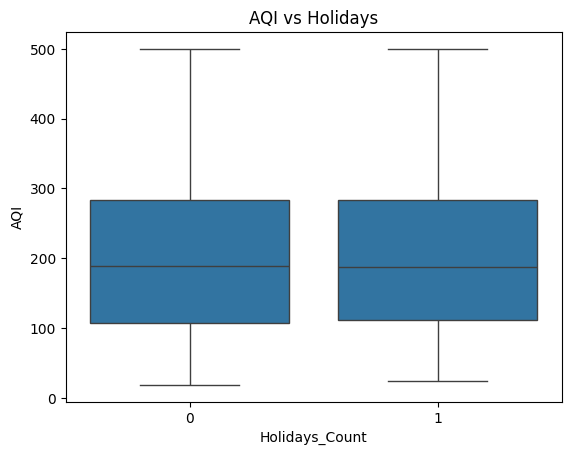

In [ ]:
sns.boxplot(x='Holidays_Count', y='AQI', data=df)
plt.title("AQI vs Holidays")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

holiday_aqi = df[df['Holidays_Count'] == 1]['AQI']
working_aqi = df[df['Holidays_Count'] == 0]['AQI']

t_stat, p_value = ttest_ind(holiday_aqi, working_aqi, equal_var=False)

print("p-value:", p_value)


p-value: 0.9863117783265551


Since p-value>0.5 holidays and non holidays doesnt affet the  Holiday effect is weak alon

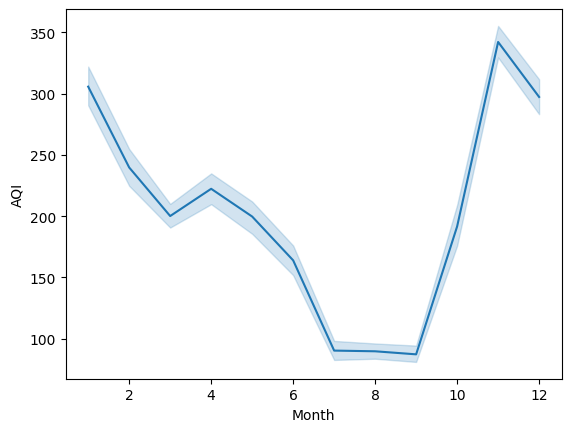

In [ ]:
sns.lineplot(x='Month', y='AQI', data=df)
plt.show()


In [ ]:
X = df_reduced.drop(columns=['AQI'])
y = df['AQI']
print(X)

      Holidays_Count   PM2.5    PM10     NO2    SO2    CO  Ozone
0                  0  408.80  442.42  160.61  12.95  2.77  43.19
1                  0  404.04  561.95   52.85   5.18  2.60  16.43
2                  1  225.07  239.04  170.95  10.93  1.40  44.29
3                  0   89.55  132.08  153.98  10.42  1.01  49.19
4                  0   54.06   55.54  122.66   9.70  0.64  48.88
...              ...     ...     ...     ...    ...   ...    ...
1456               0   58.43  249.17   41.69  65.89  0.99  36.25
1457               0   33.83  150.77   33.31  66.14  0.79  35.19
1458               1   31.21  139.75   27.01  65.94  0.57  35.88
1459               0   38.01  152.83   29.12  65.16  0.55  38.38
1460               0   80.42  318.96   40.37  64.98  0.84  39.93

[1461 rows x 7 columns]


In [ ]:
df["AQI_lag1"] = df["AQI"].shift(1)
df["AQI_lag2"] = df["AQI"].shift(2)
df["PM2.5_lag1"] = df["PM2.5"].shift(1)

df.dropna(inplace=True)


In [ ]:
df["PM_ratio"] = df["PM2.5"] / (df["PM10"] + 1)
df["NO2_SO2"] = df["NO2"] * df["SO2"]


In [ ]:
df["is_weekend"] = df["Days"].isin([6,7]).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

print(y_test.min(), y_test.max())



34 500


In [ ]:
import numpy as np
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

pred = lr.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("AQI Range:", y_test.min(), y_test.max())
print("RMSE:", rmse)
print("R2:", r2)

AQI Range: 34 500
RMSE: 38.125103876367376
R2: 0.8879890128718012


In [ ]:
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R2  : {r2:.3f}")


In [ ]:
evaluate("Linear Regression", y_test, pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("Random Forest", y_test, rf_pred)



Linear Regression
RMSE: 38.13
MAE : 26.85
R2  : 0.888

Decision Tree
RMSE: 32.13
MAE : 20.54
R2  : 0.920

Random Forest
RMSE: 28.92
MAE : 18.58
R2  : 0.936


In [ ]:
param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
rf_pred = best_rf.predict(X_test)

evaluate("Tuned Random Forest", y_test, rf_pred)


Tuned Random Forest
RMSE: 29.29
MAE : 19.64
R2  : 0.934


In [ ]:
import pandas as pd

importances = best_rf.feature_importances_
features = X.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False)
print(fi)
